# Logistic Regression from Scratch

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sunse\AppData\Local\Temp\ipykernel_25328\1739736783.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


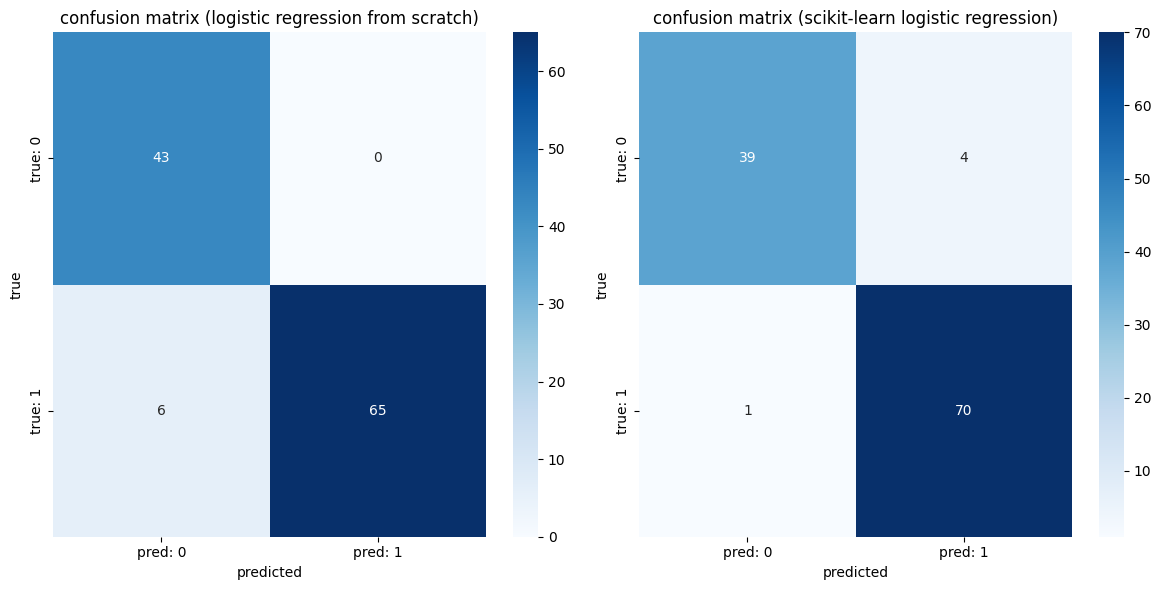

In [10]:
# logistic regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def _sigmoid(self, z):
        # apply sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # calculate gradients
            dw = np.dot(X.T, (predictions - y)) / y.size
            db = np.sum(predictions - y) / y.size

            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # predict probabilities
        model = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(model)
        return (probabilities >= 0.5).astype(int)

# load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression from scratch
lr_scratch = LogisticRegressionScratch(learning_rate=0.01, n_iterations=1000)
lr_scratch.fit(X_train, y_train)
y_pred_scratch_lr = lr_scratch.predict(X_test)

# train logistic regression using scikit-learn
lr_sklearn = LogisticRegression(max_iter=1000, random_state=42)
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn_lr = lr_sklearn.predict(X_test)

# calculate confusion matrices
cm_scratch_lr = confusion_matrix(y_test, y_pred_scratch_lr)
cm_sklearn_lr = confusion_matrix(y_test, y_pred_sklearn_lr)

# plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# logistic regression from scratch confusion matrix
sns.heatmap(cm_scratch_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[0])
axs[0].set_title('confusion matrix (logistic regression from scratch)')
axs[0].set_xlabel('predicted')
axs[0].set_ylabel('true')

# scikit-learn logistic regression confusion matrix
sns.heatmap(cm_sklearn_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['pred: 0', 'pred: 1'], yticklabels=['true: 0', 'true: 1'], ax=axs[1])
axs[1].set_title('confusion matrix (scikit-learn logistic regression)')
axs[1].set_xlabel('predicted')
axs[1].set_ylabel('true')

plt.tight_layout()
plt.show()